# K-Means Clustering

## Clustering

Clustering (or cluster analysis) is a technique that allows us to find groups (*clusters*) of similar objects that are more related to each other than to objects in other groups.

Clustering is used in a wide variety of applications, including:

- *Customer segmentation*

This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment.
For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

- *Data analysis*

When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

- *Dimensionality reduction*

Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster; affinity is any measure of how well an instance fits into a cluster.
Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional.
The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.

- *Feature engineering*

The cluster affinities can often be useful as extra features.

- *Anomaly detection* (AKA *outlier detection*)

Any instance that has a low affinity to all the clusters is likely to be an anomaly.

- *Semi-supervised learning*

If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster.
This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

- *Search engines*

Some search engines let you search for images that are similar to a reference image.
To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster.
Then when a user provides a reference image, all you’d need to do is use the trained clustering model to find this image’s cluster, and you could then simply return all the images from this cluster.

- *Image segmentation*

By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in an image.
Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

## K-Means clustering with scikit-learn

### Example 01 - K-Means clustering

#### Exploratory Data Analysis

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

In [25]:
df = pd.read_csv('./data/bank-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [27]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='age', ylabel='Count'>

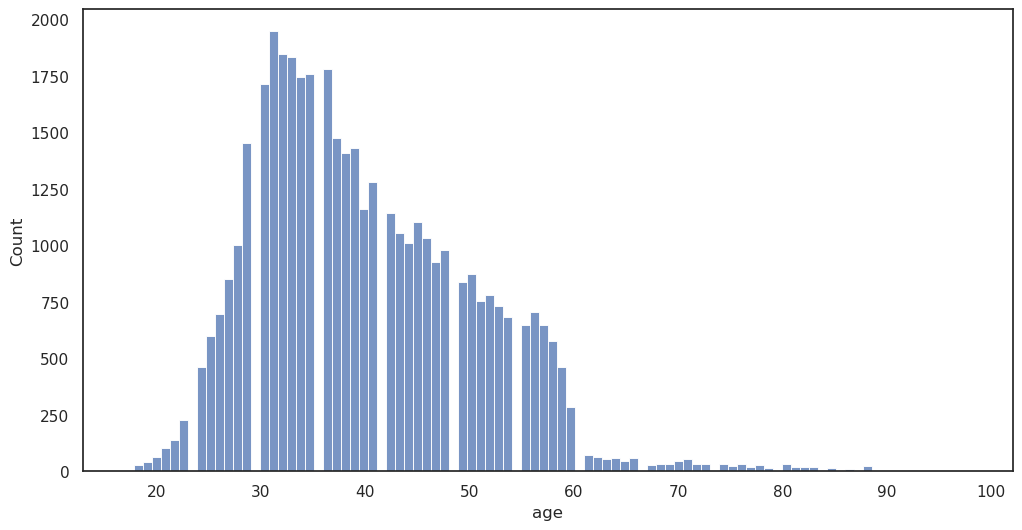

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age')

<Axes: xlabel='age', ylabel='Count'>

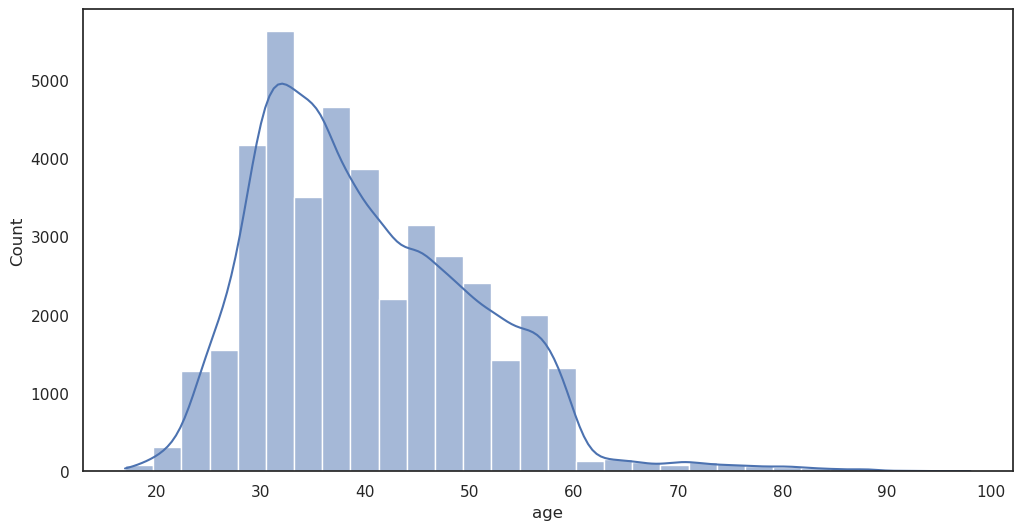

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)

<Axes: xlabel='age', ylabel='Count'>

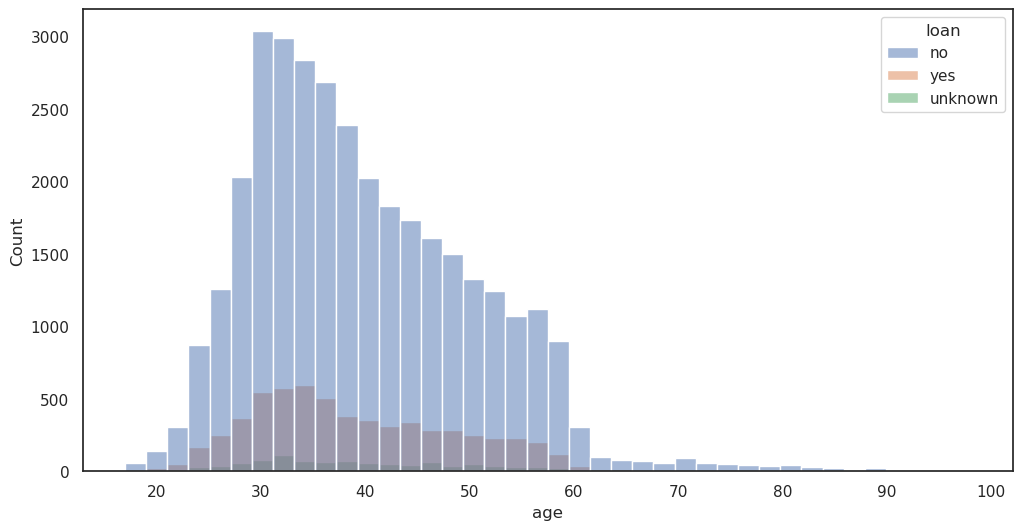

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=40, hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

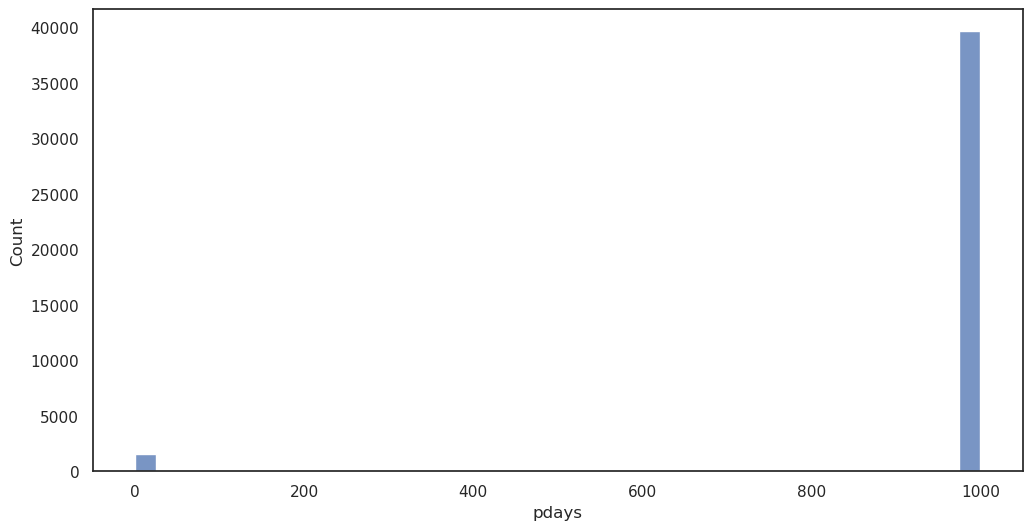

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pdays', bins=40)

<Axes: xlabel='pdays', ylabel='Count'>

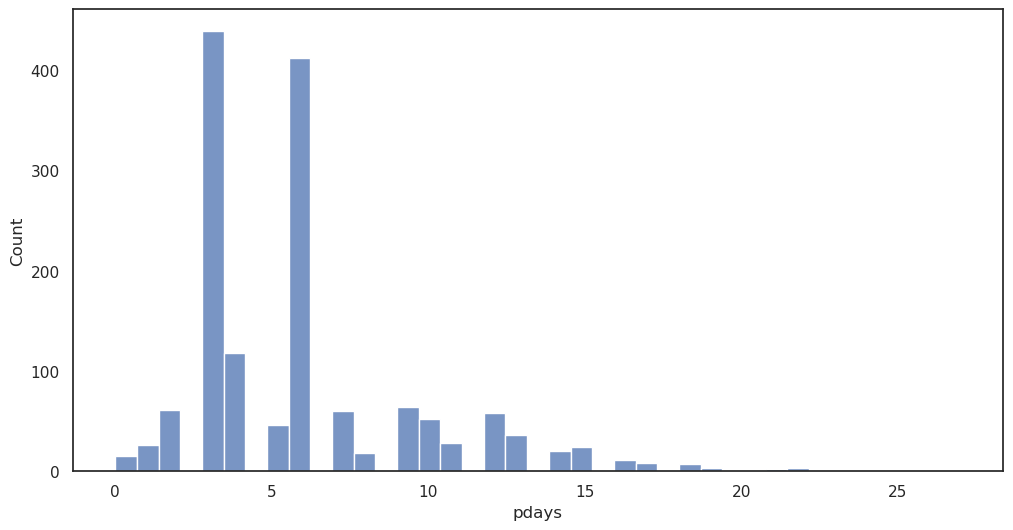

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['pdays']!=999], x='pdays')

In [46]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

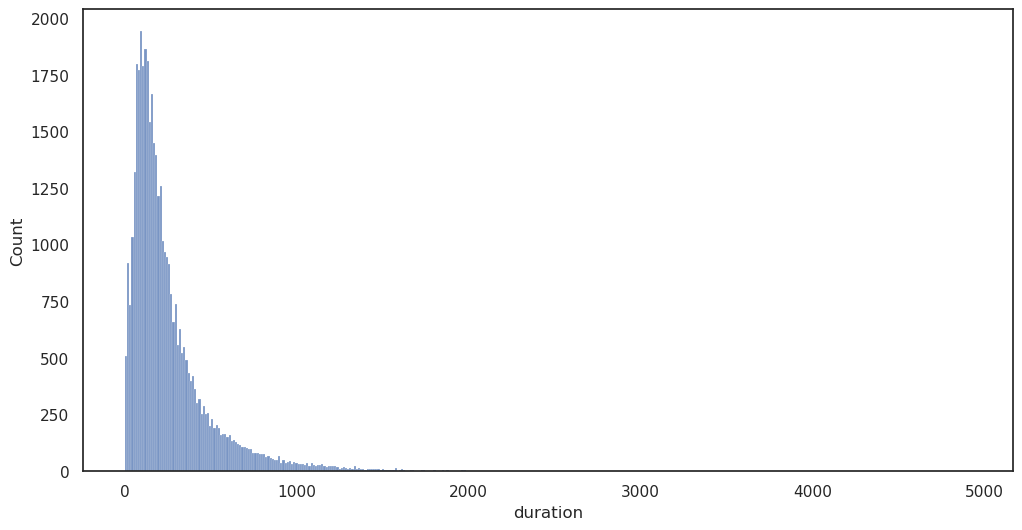

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration')

<Axes: xlabel='duration', ylabel='Count'>

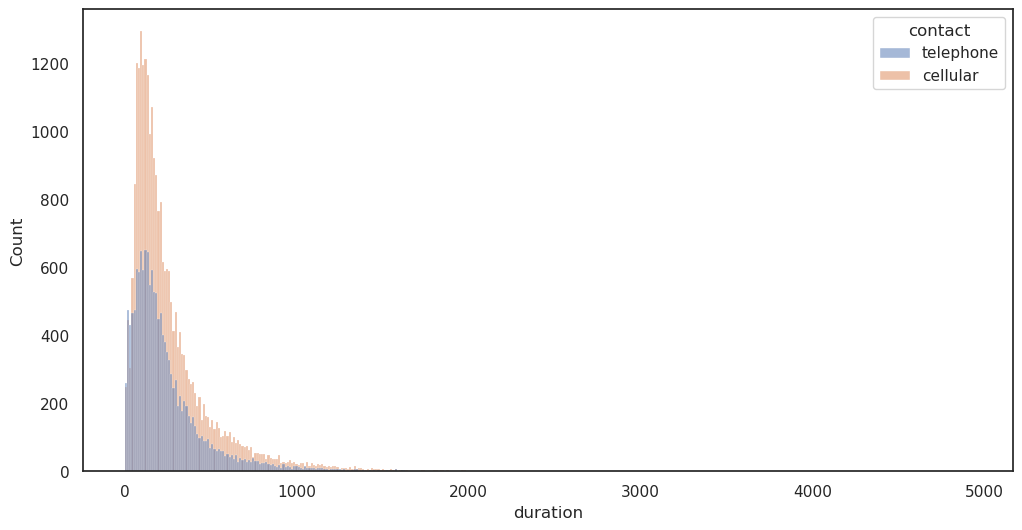

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='contact')

(0.0, 1000.0)

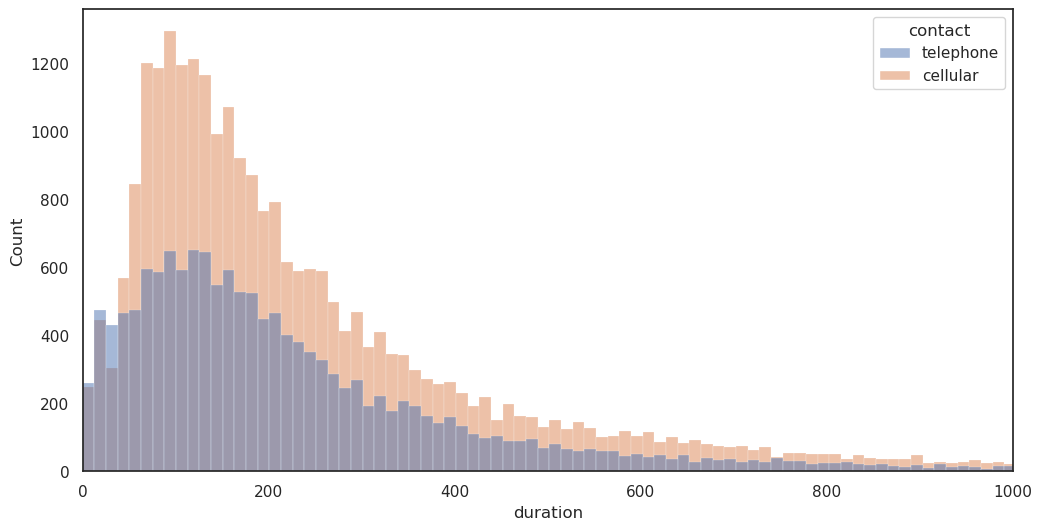

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 1000)

<Axes: xlabel='contact', ylabel='count'>

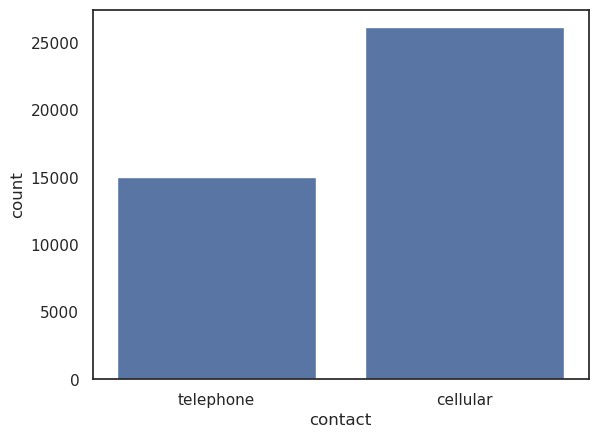

In [51]:
sns.countplot(data=df, x='contact')

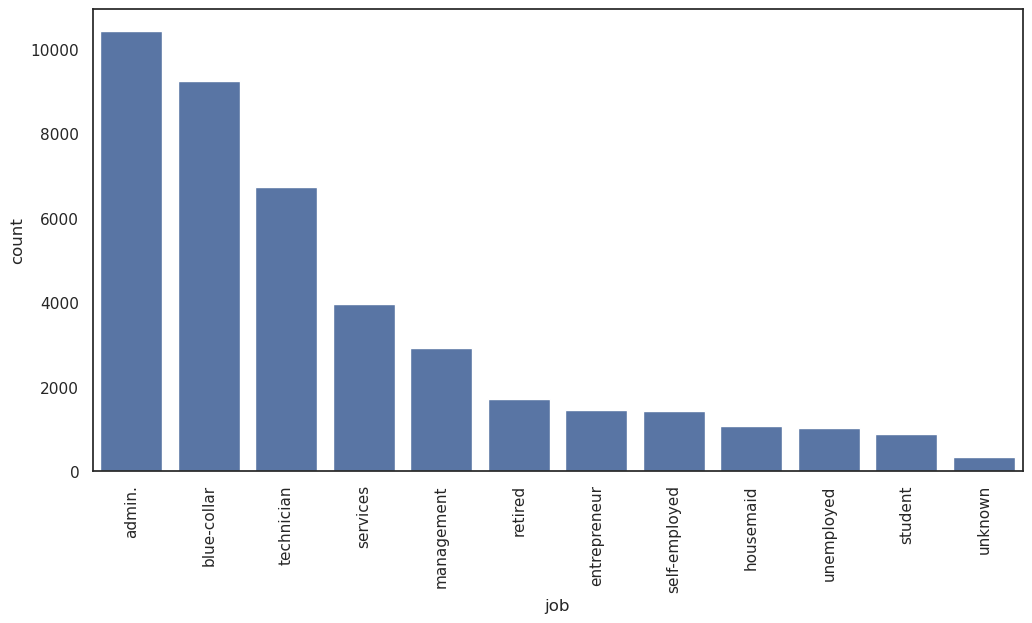

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

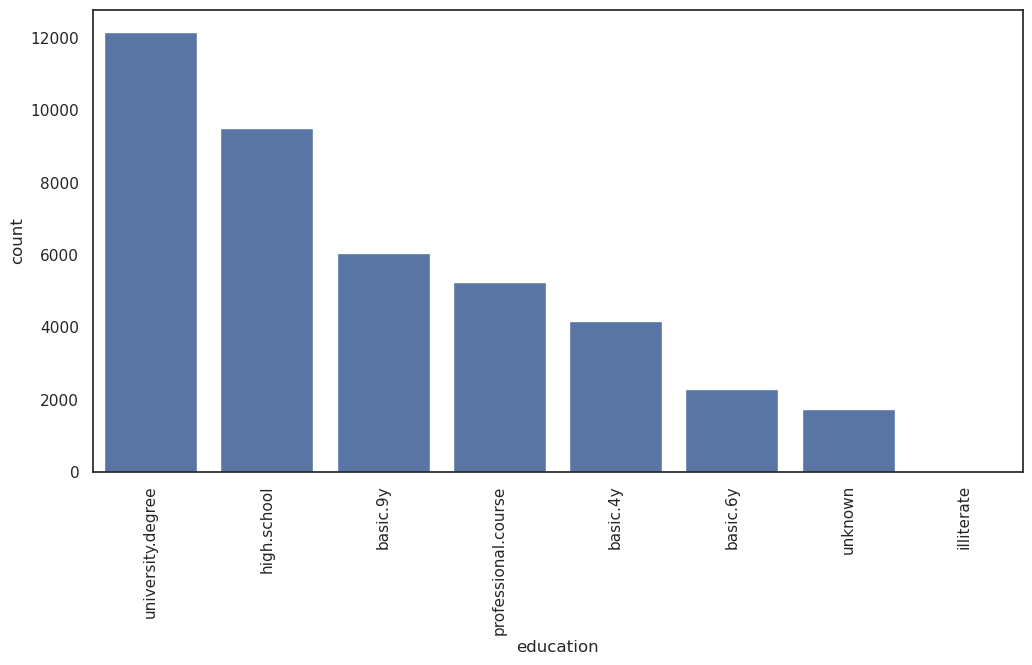

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

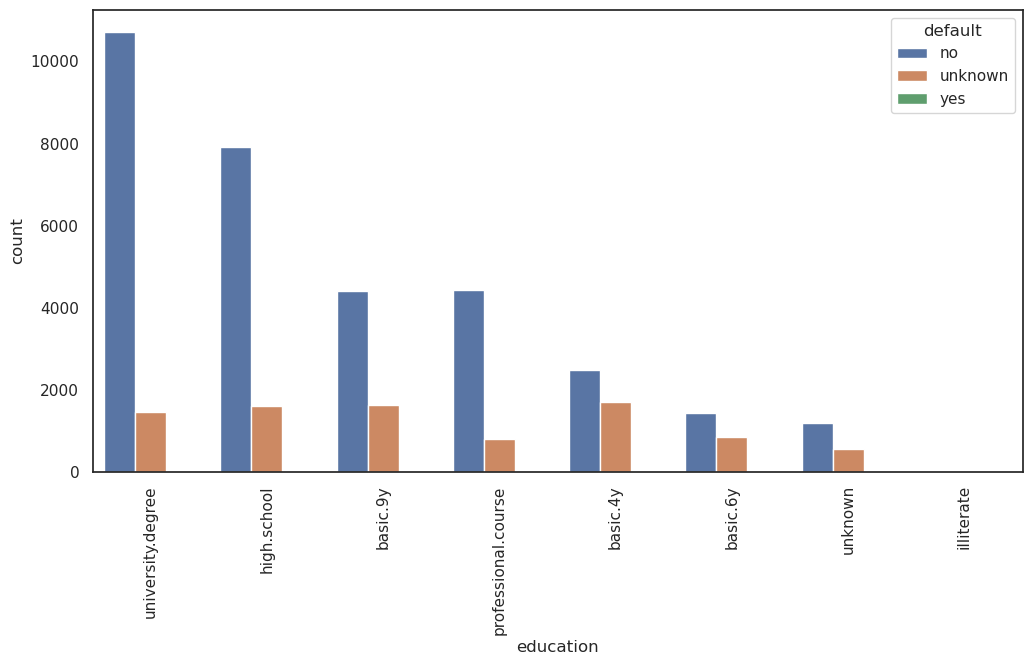

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='default', ylabel='count'>

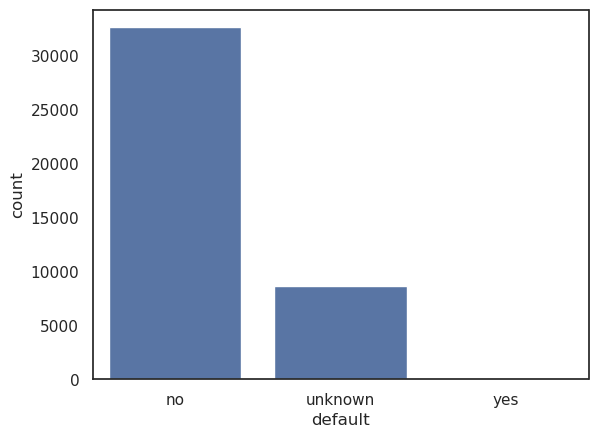

In [59]:
sns.countplot(data=df, x='default')

In [60]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [61]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

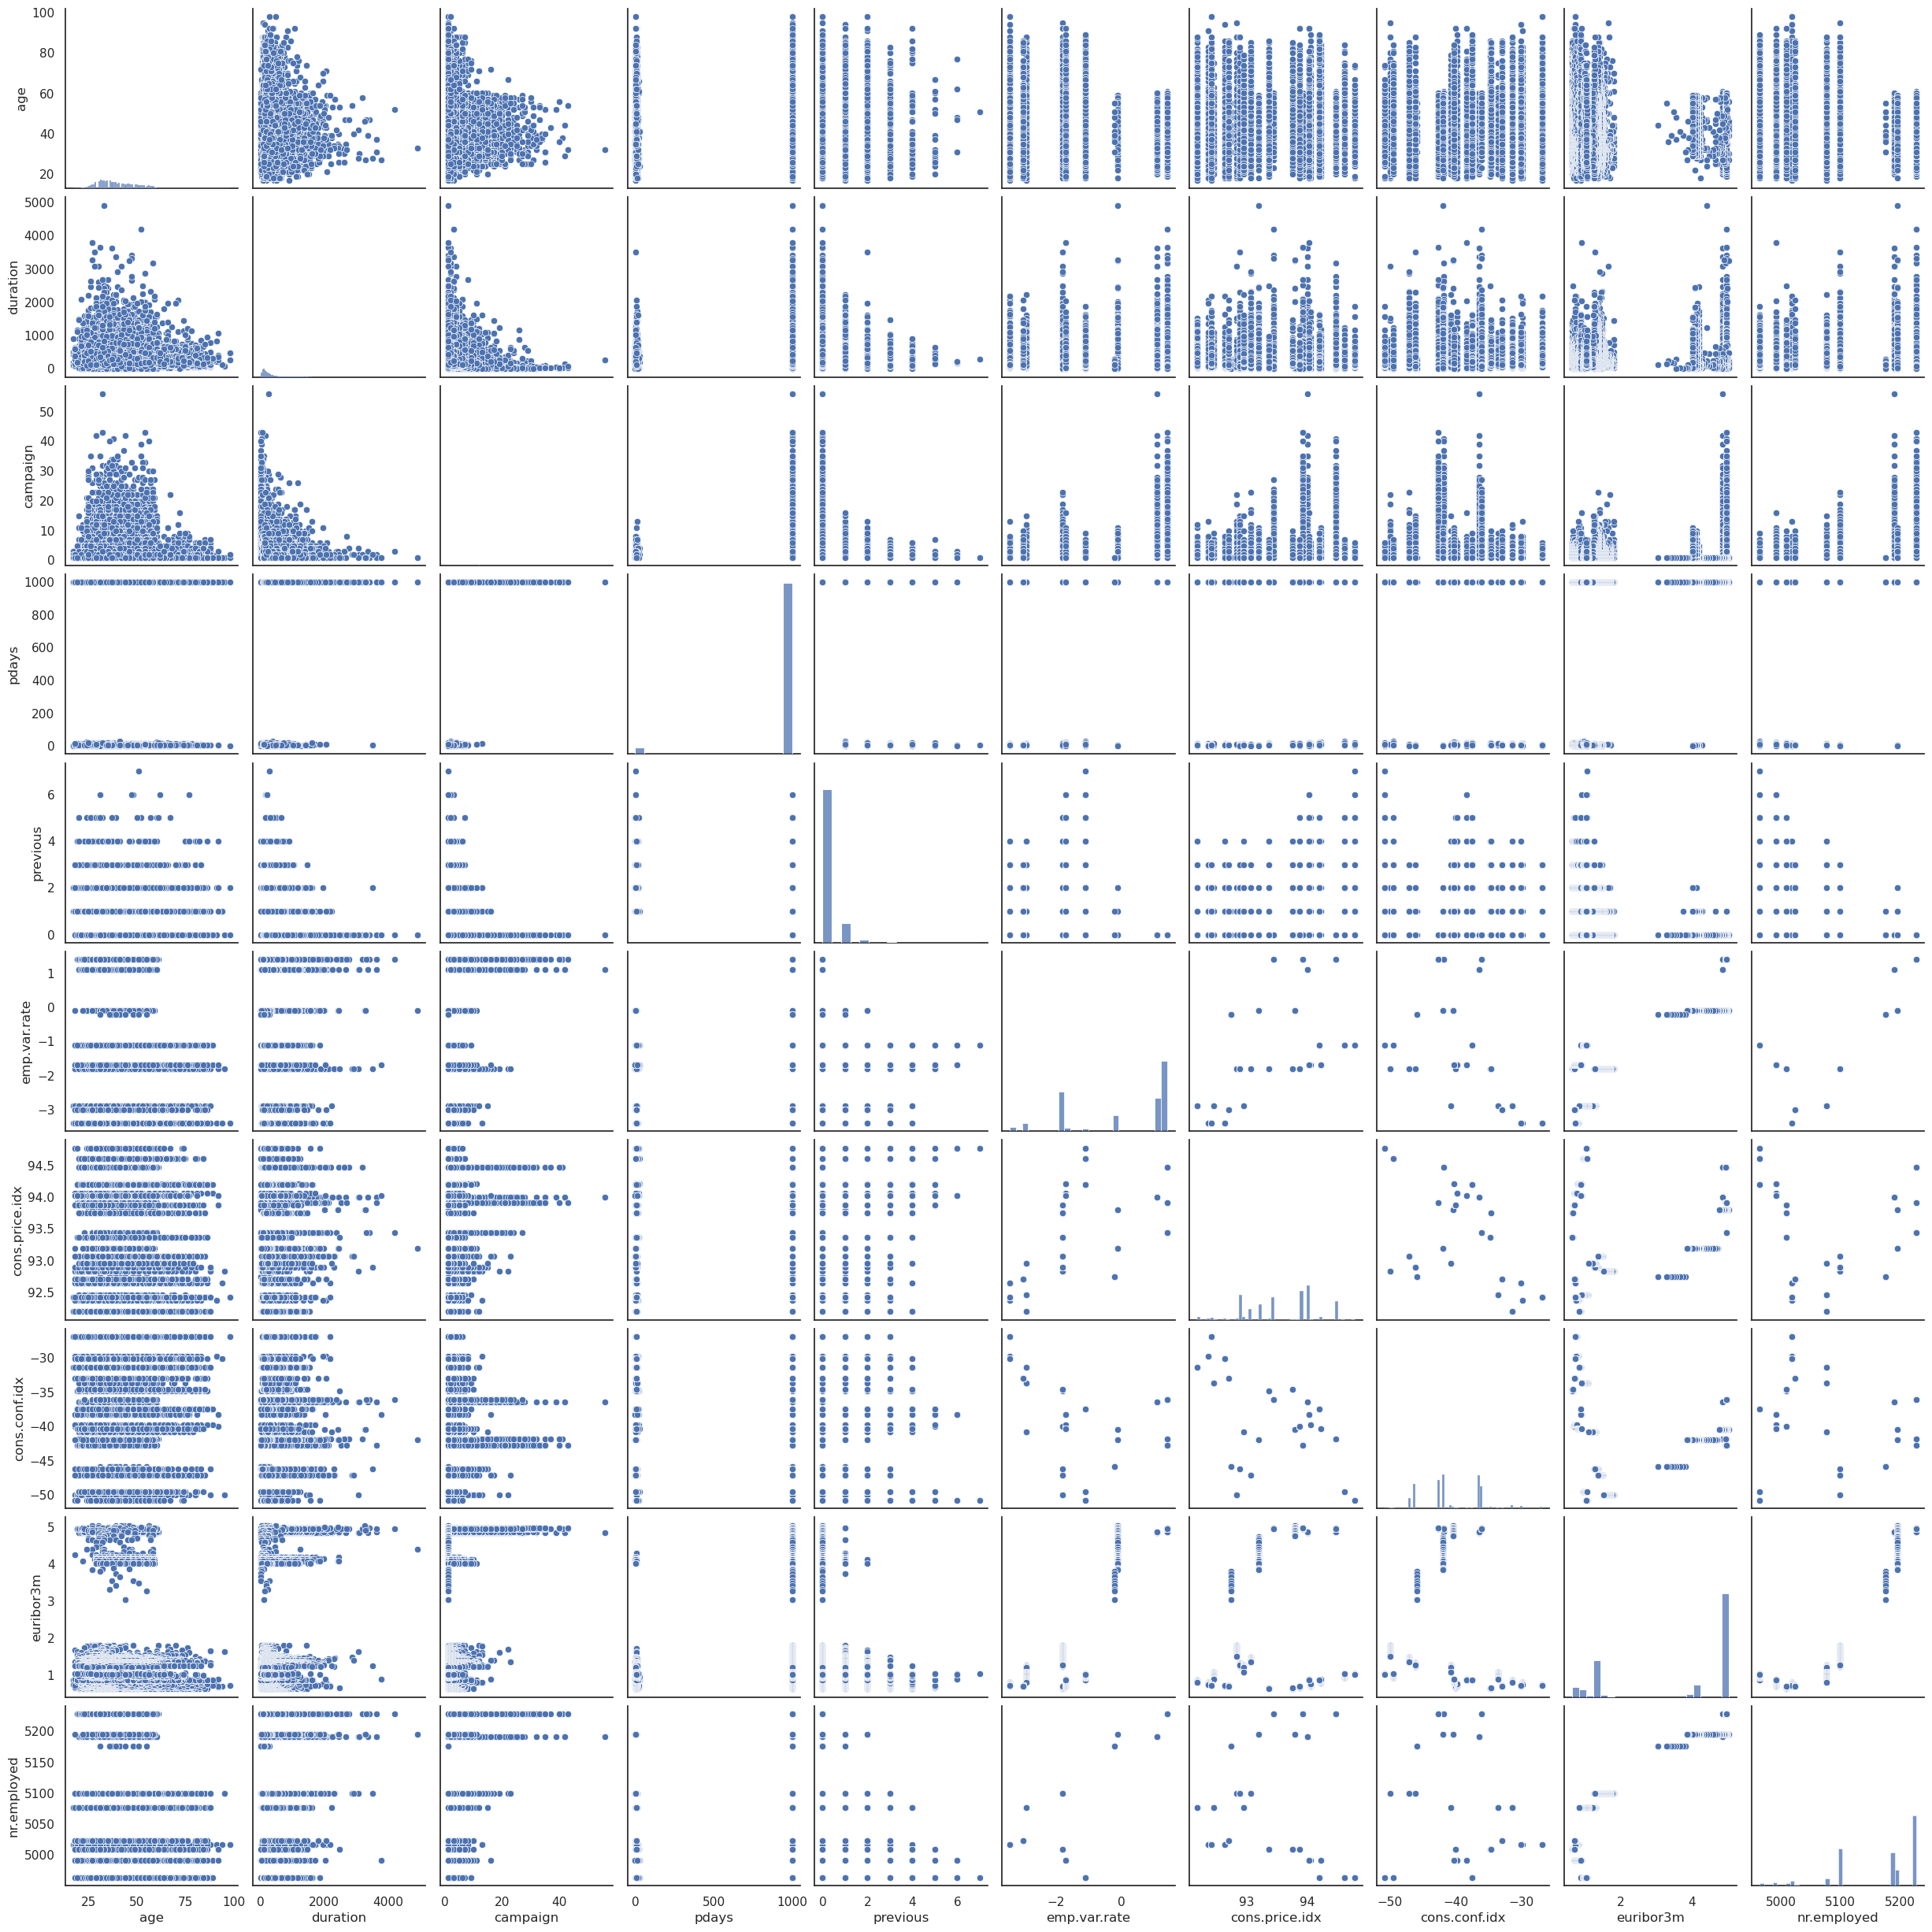

In [62]:
sns.pairplot(df)

#### Data Preparation and Model Fitting

In [166]:
X = pd.get_dummies(df)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()

In [169]:
scaled_X = scaler.fit_transform(X)

In [170]:
from sklearn.cluster import KMeans

In [171]:
# model = KMeans(n_clusters=2)

model = KMeans(n_clusters=6)

In [172]:
cluster_labels = model.fit_predict(scaled_X)

In [173]:
X['Cluster'] = cluster_labels

In [174]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,2
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,2
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,2
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,4
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,4
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,4
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,4


In [175]:
X.corr()['Cluster'].iloc[:-1].sort_values()

contact_telephone   -0.644992
job_self-employed   -0.435200
cons.price.idx      -0.369316
euribor3m           -0.354939
cons.conf.idx       -0.348523
                       ...   
poutcome_failure     0.184340
previous             0.198002
default_no           0.251936
month_jul            0.520358
contact_cellular     0.644992
Name: Cluster, Length: 65, dtype: float64

<Axes: >

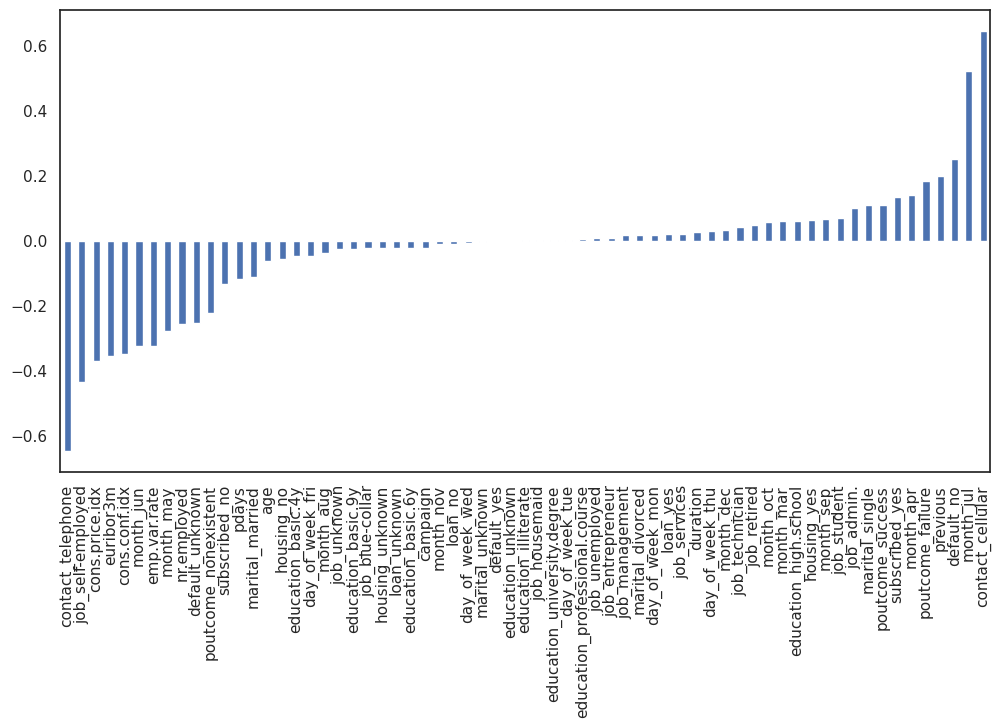

In [176]:
plt.figure(figsize=(12, 6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

#### Choosing a K Value using the sum of squared distances

In [177]:
ssd =  []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

In [178]:
ssd

[2469792.4868773283,
 2370786.566221677,
 2323883.5305962698,
 2269688.645936526,
 2212125.541652941,
 2172042.234513064,
 2049365.7021740912,
 2044741.9887384635]

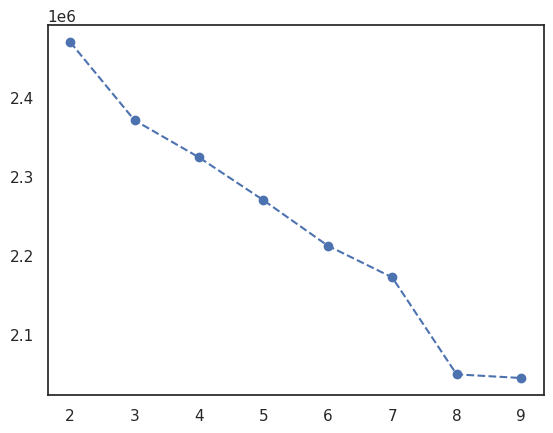

In [179]:
plt.plot(range(2,10), ssd, 'o--')

In [180]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.323884e+06
3    2.269689e+06
4    2.212126e+06
5    2.172042e+06
6    2.049366e+06
7    2.044742e+06
dtype: float64

In [181]:
pd.Series(ssd).diff().sort_values()

6   -122676.532339
1    -99005.920656
4    -57563.104284
3    -54194.884660
2    -46903.035625
5    -40083.307140
7     -4623.713436
0              NaN
dtype: float64

### Color quantization using K-Means

In [182]:
import matplotlib.image as mpimg

In [183]:
image_as_array = mpimg.imread('./img/palm-trees.jpg')

In [184]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [185]:
image_as_array.shape

(1401, 934, 3)

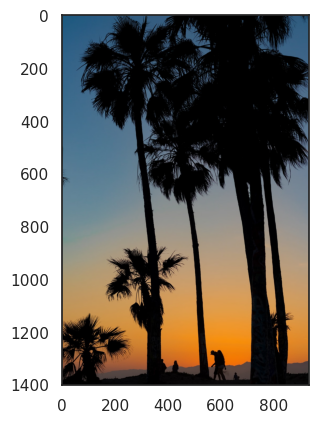

In [186]:
plt.imshow(image_as_array)

In [187]:
(h,w,c) = image_as_array.shape

In [188]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [189]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], shape=(1308534, 3), dtype=uint8)

In [190]:
len(image_as_array.shape)

3

In [191]:
len(image_as_array2d.shape)

2

In [198]:
picmod = KMeans(n_clusters=6)

In [199]:
labels = picmod.fit_predict(image_as_array2d)

In [200]:
labels

array([4, 4, 4, ..., 1, 1, 1], shape=(1308534,), dtype=int32)

In [204]:
rgb_codes = picmod.cluster_centers_.round(0).astype(int)

In [205]:
rgb_codes

array([[ 68,  62,  62],
       [  3,   3,   4],
       [139, 145, 143],
       [219, 135,  46],
       [ 72, 110, 138],
       [194, 154, 107]])

In [206]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]], shape=(1308534, 3))

In [208]:
quantized_image = np.reshape(rgb_codes[labels], (h,w,c))

In [209]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [210]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

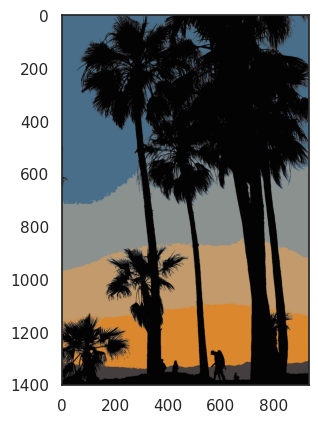

In [211]:
plt.imshow(quantized_image)